# Data Analysis: 
## M. Zhang - Detecting Reference Errors in Scientific Literature with Large Language Models

In [2]:
import pandas as pd

# read the xlsx data into a pandas dataframe
df = pd.read_excel('../data/ReferenceErrorDetection_data.xlsx')

In [3]:
df.head()

,Source,Citing Article DOI,Citing Article Title,Domain,Statement with Citation,Reference Article DOI,Reference Article Title,Reference Article Abstract,Reference Article PDF Available,Label,Explanation
0,PubPeer,10.1016/j.est.2021.103553,Heating a residential building using the heat ...,Engineering,Others have aimed to reduce irreversibility or...,10.1155/2021/2087027,A Fault Analysis Method for Three-Phase Induct...,The fault prediction and abductive fault diagn...,Yes,Unsubstantiate,Irrelevant
1,PubPeer,10.1016/j.est.2021.103553,Heating a residential building using the heat ...,Engineering,Some researchers have also studied various hea...,10.1016/j.physa.2018.12.031,Develop 24 dissimilar ANNs by suitable archite...,The artificial neural network optimization met...,Yes,Unsubstantiate,Irrelevant
2,PubPeer,10.1155/2022/4601350,Oxidative Potential and Nanoantioxidant Activi...,Chemistry,The relative content of total flavonoids in th...,10.1088/1742-6596/1937/1/012038,Lipid Data Acquisition for devices Treatment o...,"Recently, the widespread deployment of smart p...",Yes,Unsubstantiate,Irrelevant
3,PubPeer,10.1155/2022/2408685,The Choice of Anesthetic Drugs in Outpatient H...,Medicine,Research has shown that remimazolam tosylate e...,10.1186/s12871-018-0543-3,"Effect of propofol on breast cancer cell, the ...",Breast cancer is the second leading cause of c...,Yes,Unsubstantiate,Irrelevant
4,PubPeer,10.1155/2022/4783847,A Fault-Tolerant Structure for Nano-Power Comm...,Engineering,if the efficiency of the routing algorithm is ...,10.36410/jcpr.2022.23.3.312,Analysis and research hotspots of ceramic mate...,"From the perspective of scientometrics, comb t...",Yes,Unsubstantiate,Irrelevant


In [4]:
total_entries = len(df)
# or
total_entries = df.shape[0]

print(total_entries)

250


In [5]:
null_citing_article_doi_count = df['Citing Article DOI'].isnull().sum()
print(null_citing_article_doi_count)

0


In [6]:
null_citing_article_doi_count = df['Reference Article DOI'].isnull().sum()
print(null_citing_article_doi_count)

0


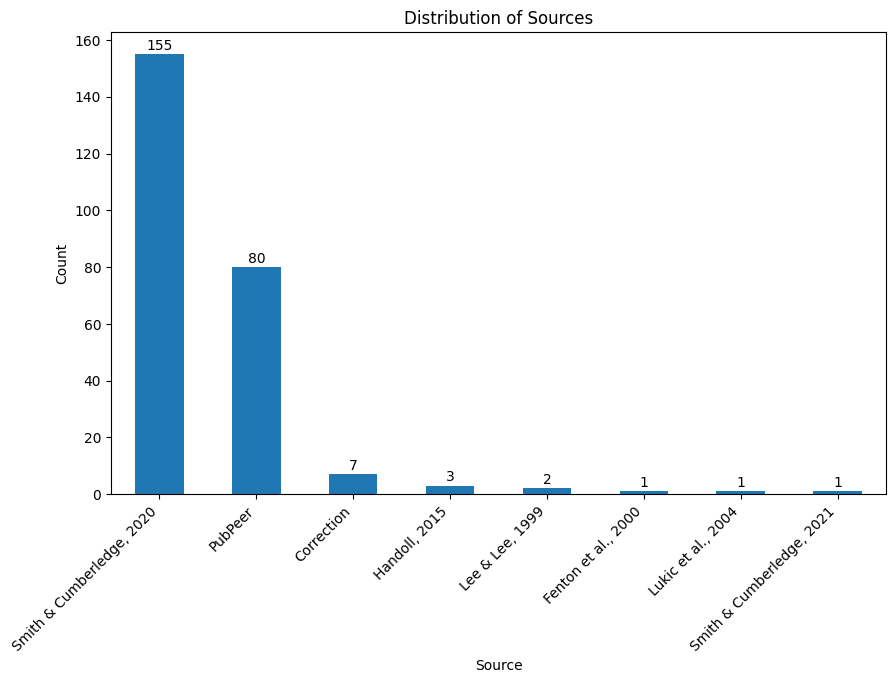

In [28]:
import matplotlib.pyplot as plt

# Count the occurrences of each source
source_counts = df['Source'].value_counts()

# Plot the bar diagram
plt.figure(figsize=(10, 6))
ax = source_counts.plot(kind='bar')
plt.title('Distribution of Sources')
plt.xlabel('Source')
plt.ylabel('Count')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Add the total number above each bar, aligned vertically with the middle of the bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height() + 3), 
                ha='center', va='center')

plt.show()

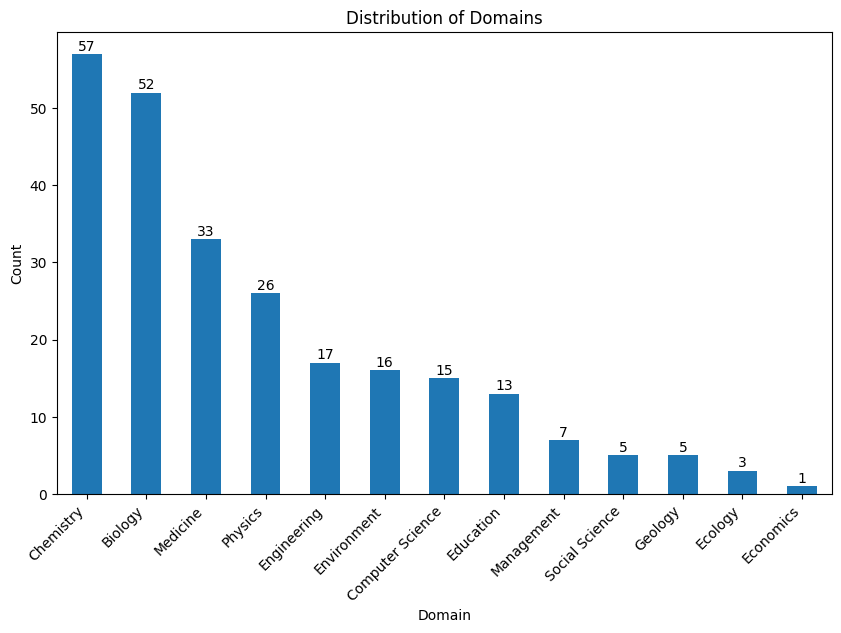

In [30]:
import matplotlib.pyplot as plt

# Count the occurrences of each source
source_counts = df['Domain'].value_counts()

# Plot the bar diagram
plt.figure(figsize=(10, 6))
ax = source_counts.plot(kind='bar')
plt.title('Distribution of Domains')
plt.xlabel('Domain')
plt.ylabel('Count')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Add the total number above each bar, aligned vertically with the middle of the bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height() + 1), 
                ha='center', va='center')
    
plt.show()

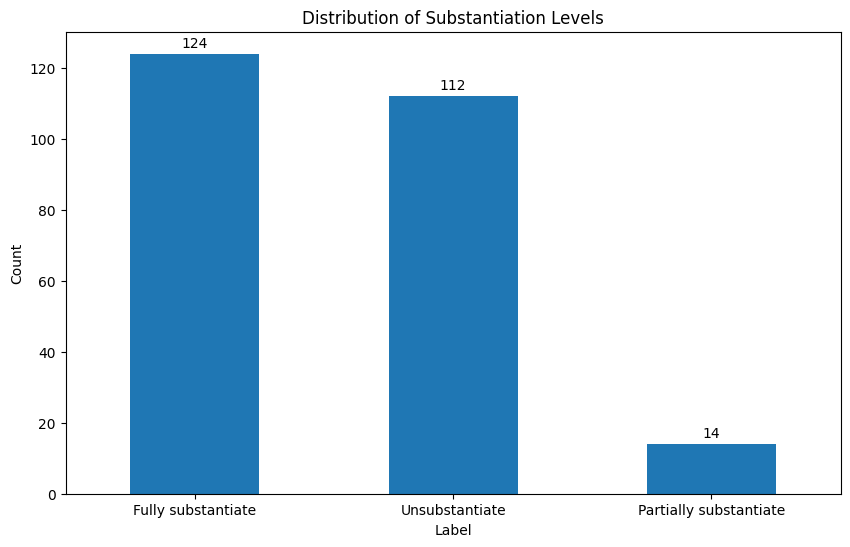

In [31]:
import matplotlib.pyplot as plt

# Count the occurrences of each source
source_counts = df['Label'].value_counts()

# Plot the bar diagram
plt.figure(figsize=(10, 6))
ax = source_counts.plot(kind='bar')
plt.title('Distribution of Substantiation Levels')
plt.xlabel('Label')
plt.ylabel('Count')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Add the total number above each bar, aligned vertically with the middle of the bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height() + 3), 
                ha='center', va='center')
    
plt.show()

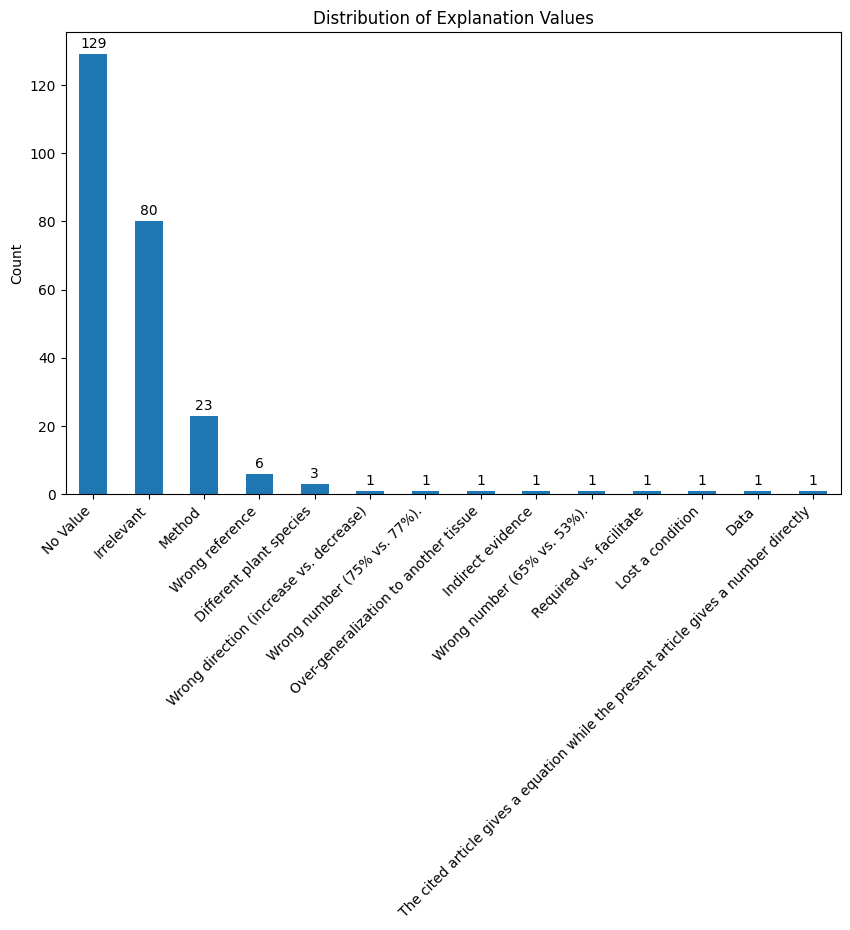

In [32]:
import matplotlib.pyplot as plt

# Fill missing values with 'No Value'
df['Explanation'] = df['Explanation'].fillna('No Value')

# Count the occurrences of each explanation
source_counts = df['Explanation'].value_counts()

# Plot the bar diagram
plt.figure(figsize=(10, 6))
ax = source_counts.plot(kind='bar')
plt.title('Distribution of Explanation Values')
plt.xlabel('')
plt.ylabel('Count')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Add the total number above each bar, aligned vertically with the middle of the bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height() + 3), 
                ha='center', va='center')
    
plt.show()

### Preperation for Bulk import into Zotero

Reference Articles

In [8]:
for index, row in df.iterrows():
    print(f"{row['Reference Article Title']}, {row['Reference Article DOI']}\n")

A Fault Analysis Method for Three-Phase Induction Motors Based on Spiking Neural P Systems, 10.1155/2021/2087027

Develop 24 dissimilar ANNs by suitable architectures & training algorithms via sensitivity analysis to better statistical presentation: Measure MSEs between targets & ANN for Fe–CuO/Eg–Water nanofluid, 10.1016/j.physa.2018.12.031

Lipid Data Acquisition for devices Treatment of Coronary Diseases Health stuff on the Internet of Medical Things, 10.1088/1742-6596/1937/1/012038

Effect of propofol on breast cancer cell, the immune system, and patient outcome, 10.1186/s12871-018-0543-3

Analysis and research hotspots of ceramic materials in textile application, 10.36410/jcpr.2022.23.3.312

Knowledge map visualization of technology hotspots and development trends in China’s textile manufacturing industry, 10.1049/cim2.12024

Is a negative correlation between sTNFR1 and TNF in patients with chronic Chagas disease the key to clinical progression?, 10.1016/j.imbio.2021.152166

A neg

In [9]:
for index, row in df.iterrows():
    print(f"{row['Citing Article Title']}, {row['Citing Article DOI']}\n")

Heating a residential building using the heat generated in the lithium ion battery pack by the electrochemical process, 10.1016/j.est.2021.103553

Heating a residential building using the heat generated in the lithium ion battery pack by the electrochemical process, 10.1016/j.est.2021.103553

Oxidative Potential and Nanoantioxidant Activity of Flavonoids and Phenolic Acids in Sophora flavescens, 10.1155/2022/4601350

The Choice of Anesthetic Drugs in Outpatient Hysteroscopic Surgery: A Systematic Review and Network Meta-Analysis, 10.1155/2022/2408685

A Fault-Tolerant Structure for Nano-Power Communication Based on the Multidimensional Crossbar Switch Network, 10.1155/2022/4783847

A Secure Routing Protocol for Wireless Sensor Energy Network Based on Trust Management, 10.1155/2022/5955543

A Study on the Impact of International Translation Levels Based on Multiple Correlation Analysis, 10.1155/2022/9120772

A Study on the Impact of International Translation Levels Based on Multiple Cor